<a href="https://colab.research.google.com/github/hailes1/BetterFit/blob/master/Percolation_Project_Dag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Percolation Project
#####Done by: Dagmawe Haileslassie

In this project we are going to be examining the 2D percolation problem in which we have a n × n grid of squares. Each square is either “open” with probability p or “closed” with probability 1 − p. We say that percolation occurs if there is a path of open squares from any square in the top row to any square in the bottom row of the grid. let's see what this looks like in a diagram. 

# Introduction

In [4]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Let's start with defining the variables:
n: the number of rows and columns in the grid
p: probability that a square is "open"

In [5]:
n = 10
p = 0.6

In [6]:
grid = (np.random.rand(n,n) < p).astype(int)
grid # 0 indicates closed and 1 indicates open 

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])

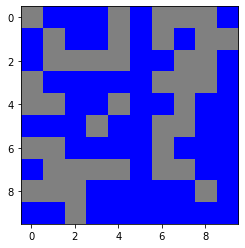

In [7]:
mycolormap = ListedColormap(["grey", "blue"])
plt.imshow(grid, cmap=mycolormap)

In [8]:
#create an exception that will ovvur if we find percolation
class percolationFound(Exception): pass
def query(row, col, grid, visited):
  #print("visiting square", row, ",", col)
  #Mark as Visited
  visited[row,col] = 1
  #Final Checker 
  (numRows, numCols) = np.shape(grid)
  if row == numRows-1:
    #print("Path Found!")
    raise percolationFound
  else:
      if grid[row+1][col] == 1 and visited[row+1,col] == 0:
        query(row+1, col, grid, visited)


      if col > 0 and grid[row][col-1] == 1 and visited[row,col-1] == 0:
        query(row, col-1, grid, visited)


      if col < numCols-1 and grid[row][col+1] == 1 and visited[row,col+1] == 0:
        query(row, col+1, grid, visited)


      if row > 0 and grid[row-1][col] == 1 and visited[row-1,col] == 0:
        query(row-1, col, grid, visited)
#driver function that looks for percolation in a grid and it returns True if percolation found and false otherwise 
def findPercolation(grid):
  #setting up the visited matrix
  (numRows, numCols) = np.shape(grid)
  visited = np.zeros((numRows,numCols))

  #look for a percolation found
  try:#This code might raise an error, if the error occurs then python would go to except
    for c in range(numCols):
      if grid[0,c] == 1:
        query(0,c,grid,visited)
  except percolationFound: #Will run if percolation is found
    #print("percolation is found")
    return True 
  else: #will run if percolation is not found 
    #print("percolation is not found")
    return False


In [9]:
print(grid)
findPercolation(grid)

[[0 1 1 1 0 1 0 0 0 1]
 [1 0 1 1 0 1 0 1 0 0]
 [1 0 0 0 0 1 1 0 0 1]
 [0 1 1 1 1 1 0 0 0 1]
 [0 0 1 1 0 1 1 0 1 1]
 [1 1 1 0 1 1 0 0 1 1]
 [0 0 1 1 1 1 0 1 1 1]
 [1 0 0 0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1 1 0 1]
 [1 1 0 1 1 1 1 1 1 1]]


True

In the above code chunk we can see that when entering our grid into the depth first seach algorithm we created in class to see if percolation occurs or not we get a False value which shows us that it doesn't. 

# How does the probability of percolation depend on p when n is fixed?

To explore the above question let us begin by setting  n = 10 and we then try to find the probability of percolation for various values of p which in our case will be within the range of 0.1 - 0.9 increasing by 0.1 each time and we run that 100,000 times to get a more accurate representation. We will then make a plot of the different percentages of percolation showing how the probability of percolation depends on p when n = 10. Let's see how this works. 

In [10]:
def percolationsInput(n,p,numTimes):
  count = 0
  for i in range(numTimes):
    grid = (np.random.rand(n,n) < p).astype(int) # 0 indicates closed and 1 indicates open 
    values = findPercolation(grid) # saving a true of false value of finding percolation for a specific grid 
    #print("run number", i)
    #print(values)
    if values == True:
      count += 1
  prop = (count/numTimes)*100 # which is the percentage of a 100 runs for a single value of p
  return prop

In [11]:
percolationsInput(10,0.6,10000)

56.18

In [12]:
def percolationforMultiplePStart(n,numTimes):
  nvals = np.arange (0.1, 1.0, 0.1)
  #listofP = [i for i in range(1,11,1)]
  print(*nvals)
  oneRunList = [percolationsInput(n,p,numTimes) for p in nvals]
  print(oneRunList)
  plt.plot(nvals, oneRunList, 'go')
  plt.xlabel("values of P")
  plt.ylabel("Percentage of percolation")


0.1 0.2 0.30000000000000004 0.4 0.5 0.6 0.7000000000000001 0.8 0.9
[0.0, 0.0, 0.0, 1.9, 14.799999999999999, 54.7, 91.2, 99.5, 100.0]


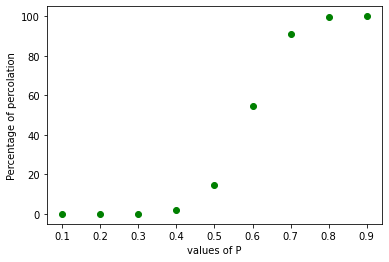

In [13]:
percolationforMultiplePStart(10, 1000)

0.1 0.2 0.30000000000000004 0.4 0.5 0.6 0.7000000000000001 0.8 0.9
[0.0, 0.0, 0.0, 0.0, 0.6, 58.099999999999994, 99.8, 100.0, 100.0]


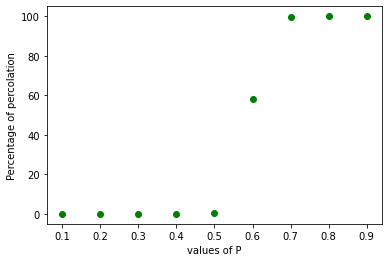

In [15]:
percolationforMultiplePStart(40, 1000)

Intuitively we know that for values 0.1 upto 0.3/0.4 then the probabilty of percolation is going to be close to 0(very small). Therefore we should zoom into the different values of p from 0.4 - 0.8 to see how much the probability changes for such abiogious values. 

In [17]:
def percolationforMultipleP(n,numTimes):
  nvals = np.arange (0.5, 0.7, 0.01)
  #listofP = [i for i in range(1,11,1)]
  print(*nvals)
  oneRunList = [percolationsInput(n,p,numTimes) for p in nvals]
  print(oneRunList)
  plt.plot(nvals, oneRunList, 'go')
  plt.xlabel("values of Probability that each square is open")
  plt.ylabel("Percentage of times percolation occurs")

0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.5700000000000001 0.5800000000000001 0.5900000000000001 0.6000000000000001 0.6100000000000001 0.6200000000000001 0.6300000000000001 0.6400000000000001 0.6500000000000001 0.6600000000000001 0.6700000000000002 0.6800000000000002 0.6900000000000002
[4.6, 7.5, 8.799999999999999, 13.3, 16.7, 21.5, 26.0, 35.8, 43.2, 48.8, 58.099999999999994, 63.0, 72.1, 78.5, 80.7, 85.8, 91.0, 93.2, 96.7, 96.6]


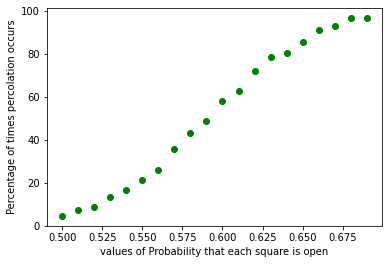

In [ ]:
percolationforMultipleP(20, 1000)

0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.5700000000000001 0.5800000000000001 0.5900000000000001 0.6000000000000001 0.6100000000000001 0.6200000000000001 0.6300000000000001 0.6400000000000001 0.6500000000000001 0.6600000000000001 0.6700000000000002 0.6800000000000002 0.6900000000000002
[1.2, 2.4, 4.0, 5.800000000000001, 9.3, 14.899999999999999, 22.8, 26.400000000000002, 38.5, 47.599999999999994, 56.699999999999996, 67.5, 76.3, 85.8, 88.1, 93.60000000000001, 96.6, 97.89999999999999, 98.6, 99.3]


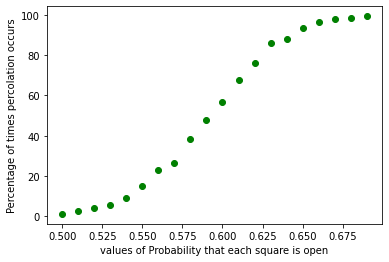

In [ ]:
percolationforMultipleP(30, 1000)

0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.5700000000000001 0.5800000000000001 0.5900000000000001 0.6000000000000001 0.6100000000000001 0.6200000000000001 0.6300000000000001 0.6400000000000001 0.6500000000000001 0.6600000000000001 0.6700000000000002 0.6800000000000002 0.6900000000000002
[0.4, 0.7000000000000001, 1.3, 4.0, 4.6, 10.299999999999999, 16.7, 23.3, 34.2, 48.5, 56.99999999999999, 68.89999999999999, 80.5, 87.7, 93.30000000000001, 96.0, 98.1, 99.4, 99.6, 99.7]


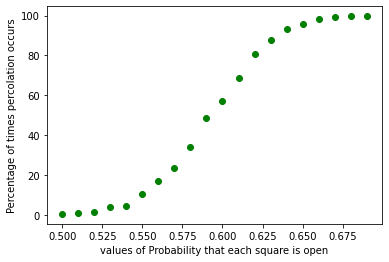

In [ ]:
percolationforMultipleP(40, 1000)

0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.5700000000000001 0.5800000000000001 0.5900000000000001 0.6000000000000001 0.6100000000000001 0.6200000000000001 0.6300000000000001 0.6400000000000001 0.6500000000000001 0.6600000000000001 0.6700000000000002 0.6800000000000002 0.6900000000000002
[0.1, 0.0, 0.1, 0.7000000000000001, 1.3, 3.9, 8.0, 20.5, 30.8, 47.199999999999996, 63.3, 75.7, 86.5, 93.8, 97.1, 99.0, 99.3, 99.9, 99.9, 100.0]


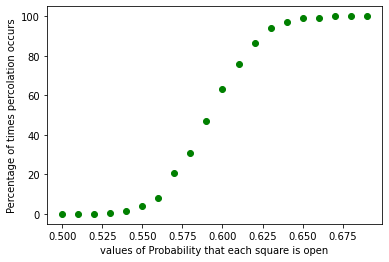

In [19]:
percolationforMultipleP(60, 1000)

I found it very interesting to see that the values for percentage of times percolation occurs is generally increasing but as we increase the value of n we could see that the smaller values of that graph definatley approach 0. For example when we look at the graoh for when n=30 the percentage drops to 0 for p value of 0.525 which was a little higher when n=30. I wonder what's happening there?

# How does the probability of percolation depend on n when p is fixed? 

To explore the above question let us begin by setting  p = .5 and we then try to find the probability of percolation for various values of n which in our case will be within the range of 5 - 55 increasing by 5 each time and we run that 10,000 times to get a more accurate representation. We will then make a plot of the different percentages of percolation showing how the probability of percolation depends on p when p = .5 , .55, .6, .65 ... Let's see how this works. 

In [ ]:
def percolationforMultipleN(p,numTimes):
  nvals = np.arange (5, 55, 5)
  print(*nvals)
  oneRunList = [percolationsInput(n,p,numTimes) for n in nvals]
  print(oneRunList)
  plt.plot(nvals, oneRunList, 'go')
  plt.xlabel("values of n")
  plt.ylabel("Percentage of percolation")

5 10 15 20 25 30 35 40 45 50
[28.000000000000004, 14.799999999999999, 9.4, 6.0, 2.4, 1.4000000000000001, 0.8, 0.4, 0.1, 0.0]


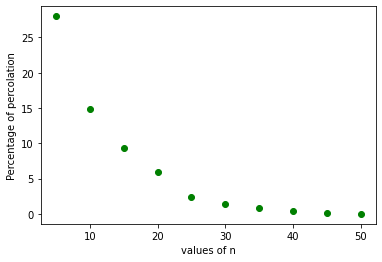

In [ ]:
percolationforMultipleN(0.5, 1000)

5 10 15 20 25 30 35 40 45 50
[41.3, 34.599999999999994, 29.9, 23.0, 18.4, 15.1, 12.6, 10.0, 8.7, 5.4]


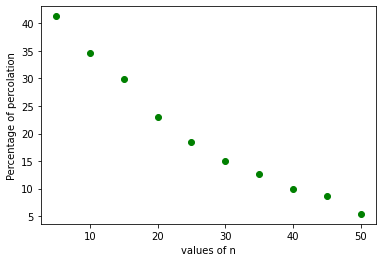

In [ ]:
percolationforMultipleN(0.55, 1000)

5 10 15 20 25 30 35 40 45 50
[55.800000000000004, 53.800000000000004, 55.00000000000001, 56.8, 58.4, 56.99999999999999, 56.599999999999994, 60.3, 60.4, 61.8]


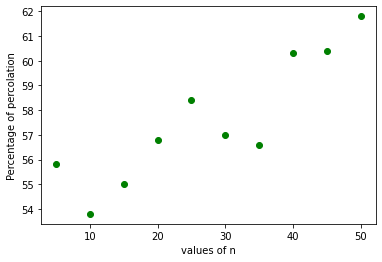

In [ ]:
percolationforMultipleN(0.6, 1000)

5 10 15 20 25 30 35 40 45 50
[69.69999999999999, 79.2, 83.39999999999999, 87.1, 88.7, 92.5, 94.39999999999999, 96.7, 96.7, 98.2]


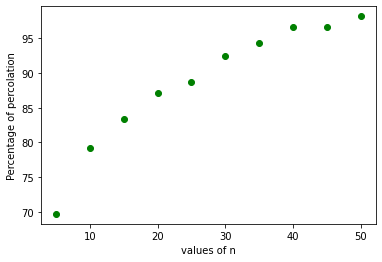

In [ ]:
percolationforMultipleN(0.65, 1000)

5 10 15 20 25 30 35 40 45 50
[81.10000000000001, 92.4, 95.5, 98.6, 99.4, 99.3, 99.9, 100.0, 100.0, 100.0]


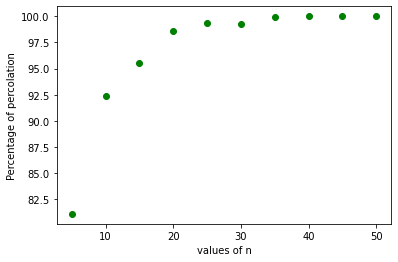

In [ ]:
percolationforMultipleN(0.7, 1000)

We can see that the trend in the total percentage of percolation was decreasing when values of p where 0.5 and 0.55 but then there was gradual shift when p turned 0.6, although we couldn't really see an increasing trend for that value when p turned 0.65 then we could generally see as the number of colomns and rows increased then the percentage of percolation also increases. One thing that I found very interesting is why there was a decreasing trend for p values 0.5 and 0.55

# Conclusion 

In conclusion we can see that both values of n and p are valuabale for a specific grid to reach chances of percolation. I thought the general trends where very interesting. When looking at the probability of percolation and it's dependance on p when n is fixed, we could see that as the values of p increased then the percentage of percolation also increased. When looking at the the probability of percolation and it's dependance on n when p is fixed, we could see that as the values of n increased then the percentage of percolation also increased but this was only true for values of .65 , .7 of p. 

#Limitations

One major limitation is I couldn't increase the range of n too much because then the algorithm that we had written reaches a recursive max. I hoped to see a bigger range for n than what I was able to. 